In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [3]:
df = pd.read_csv('ETG/SBAnational.csv', low_memory = False)
df.tail()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"
899163,9996003010,PACIFIC TRADEWINDS FAN & LIGHT,KAILUA,HI,96734,CENTRAL PACIFIC BANK,HI,0,27-Feb-97,1997,...,N,N,NaN,31-May-97,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00"


In [4]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [5]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [6]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [7]:
df.drop(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'ChgOffDate', 'DisbursementDate', ], axis = 'columns', inplace = True)

In [8]:
df.isnull().sum()

NAICS                   0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4528
LowDoc               2582
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [9]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

RevLineCr : ['N' '0' 'Y' 'T' nan '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-'
 'Q']
LowDoc : ['Y' 'N' 'C' '1' nan 'S' 'R' 'A' '0']
BalanceGross : ['$0.00 ' '$12,750.00 ' '$827,875.00 ' '$25,000.00 ' '$37,100.00 '
 '$43,127.00 ' '$84,617.00 ' '$1,760.00 ' '$115,820.00 ' '$996,262.00 '
 '$395,476.00 ' '$41,509.00 ' '$600.00 ' '$9,111.00 ' '$96,908.00 ']
MIS_Status : ['P I F' 'CHGOFF' nan]


## RevLineCr

In [10]:
df['RevLineCr'].value_counts()

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [11]:
df['RevLineCr'].replace(['`', ',', '1', 'C', '3', '2', 'R', '7', 'A', '5', '.', '4', '-', 'Q', 'T'], 'Y', inplace=True)
df['RevLineCr'].replace(['0', np.nan], 'N', inplace=True)

In [12]:
df['RevLineCr'].unique()

array(['N', 'Y'], dtype=object)

In [13]:
df['RevLineCr'].isnull().sum()

0

In [14]:
df['RevLineCr'].value_counts()

N    682418
Y    216746
Name: RevLineCr, dtype: int64

In [15]:
label_encoder = LabelEncoder()
df['RevLineCr'] = label_encoder.fit_transform(df['RevLineCr'])

In [16]:
df['RevLineCr'].value_counts()

0    682418
1    216746
Name: RevLineCr, dtype: int64

## LowDoc

In [17]:
df['LowDoc'].value_counts()

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [18]:
df['LowDoc'].isnull().sum()

2582

In [19]:
df['LowDoc'].replace(['1'], 'Y', inplace=True)
df['LowDoc'].replace(['0'], 'N', inplace=True)
df['LowDoc'].replace(['C', 'S', 'R', 'A'], np.nan, inplace=True)

In [20]:
df['LowDoc'].isnull().sum()

4515

In [21]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[['LowDoc']] = imputer.fit_transform(df[['LowDoc']])

In [22]:
df['LowDoc'].isnull().sum()

0

In [23]:
df['LowDoc'].value_counts()

N    788828
Y    110336
Name: LowDoc, dtype: int64

In [24]:
label_encoder = LabelEncoder()
df['LowDoc'] = label_encoder.fit_transform(df['LowDoc'])

In [25]:
df['LowDoc'].value_counts()

0    788828
1    110336
Name: LowDoc, dtype: int64

## MIS_Status

In [26]:
df['MIS_Status'].value_counts()

P I F     739609
CHGOFF    157558
Name: MIS_Status, dtype: int64

In [27]:
df['MIS_Status'].isnull().sum()

1997

In [28]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[['MIS_Status']] = imputer.fit_transform(df[['MIS_Status']])

In [29]:
df['MIS_Status'].isnull().sum()

0

In [30]:
df['MIS_Status'] = df.MIS_Status.astype("category").cat.codes

In [31]:
# label_encoder = preprocessing.LabelEncoder()
# df['MIS_Status'] = label_encoder.fit_transform(df['MIS_Status'])

In [32]:
df['MIS_Status'].value_counts()

1    741606
0    157558
Name: MIS_Status, dtype: int64

## SBA_Apprv

In [33]:
price = []
for i in df['SBA_Appv']:
    if('$' in i):
        clean_value = i.replace('$', '').replace(',', '')
        try:
            price.append(int(float(clean_value)))
        except ValueError:
            price.append(np.nan)
    
    else:
        price.append(np.nan)

In [34]:
df['SBA_Appv'] = price

In [35]:
df['SBA_Appv'].isnull().sum()

0

## GrAppv

In [36]:
price = []
for i in df['GrAppv']:
    if('$' in i):
        clean_value = i.replace('$', '').replace(',', '')
        try:
            price.append(int(float(clean_value)))
        except ValueError:
            price.append(np.nan)
    
    else:
        price.append(np.nan)

In [37]:
df['GrAppv'] = price

In [38]:
df['GrAppv'].isnull().sum()

0

## ChgOffPrinGr

In [39]:
price = []
for i in df['ChgOffPrinGr']:
    if('$' in i):
        clean_value = i.replace('$', '').replace(',', '')
        try:
            price.append(int(float(clean_value)))
        except ValueError:
            price.append(np.nan)
    
    else:
        price.append(np.nan)

In [40]:
df['ChgOffPrinGr'] = price

In [41]:
df['ChgOffPrinGr'].isnull().sum()

0

## DisbursementGross

In [42]:
price = []
for i in df['DisbursementGross']:
    if('$' in i):
        clean_value = i.replace('$', '').replace(',', '')
        try:
            price.append(int(float(clean_value)))
        except ValueError:
            price.append(np.nan)
    
    else:
        price.append(np.nan)

In [43]:
df['DisbursementGross'] = price

In [44]:
df['DisbursementGross'].isnull().sum()

0

## BalanceGross

In [45]:
price = []
for i in df['BalanceGross']:
    if('$' in i):
        clean_value = i.replace('$', '').replace(',', '')
        try:
            price.append(int(float(clean_value)))
        except ValueError:
            price.append(np.nan)
    
    else:
        price.append(np.nan)

In [46]:
df['BalanceGross'] = price

In [47]:
df['BalanceGross'].isnull().sum()

0

## NewExist 

In [48]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df[['NewExist']] = imputer.fit_transform(df[['NewExist']])

In [49]:
df['NewExist']

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
899159    1.0
899160    1.0
899161    1.0
899162    1.0
899163    2.0
Name: NewExist, Length: 899164, dtype: float64

In [50]:
df['NewExist'].value_counts()

1.0    645005
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

In [51]:
df['NewExist'].isnull().sum()

0

In [52]:
label_encoder = LabelEncoder()
df['NewExist'] = label_encoder.fit_transform(df['NewExist'])

In [53]:
df['NewExist'].value_counts()

1    645005
2    253125
0      1034
Name: NewExist, dtype: int64

## NAICS

In [54]:
df['NAICS'] = df['NAICS'].astype("category").cat.codes

In [55]:
df['NAICS'].isnull().sum()

0

In [56]:
df['NAICS'].value_counts()

0       201948
1226     27989
1227     19448
1238     14585
1157     14048
         ...  
1309         1
389          1
227          1
1290         1
327          1
Name: NAICS, Length: 1312, dtype: int64

# Data Visualization

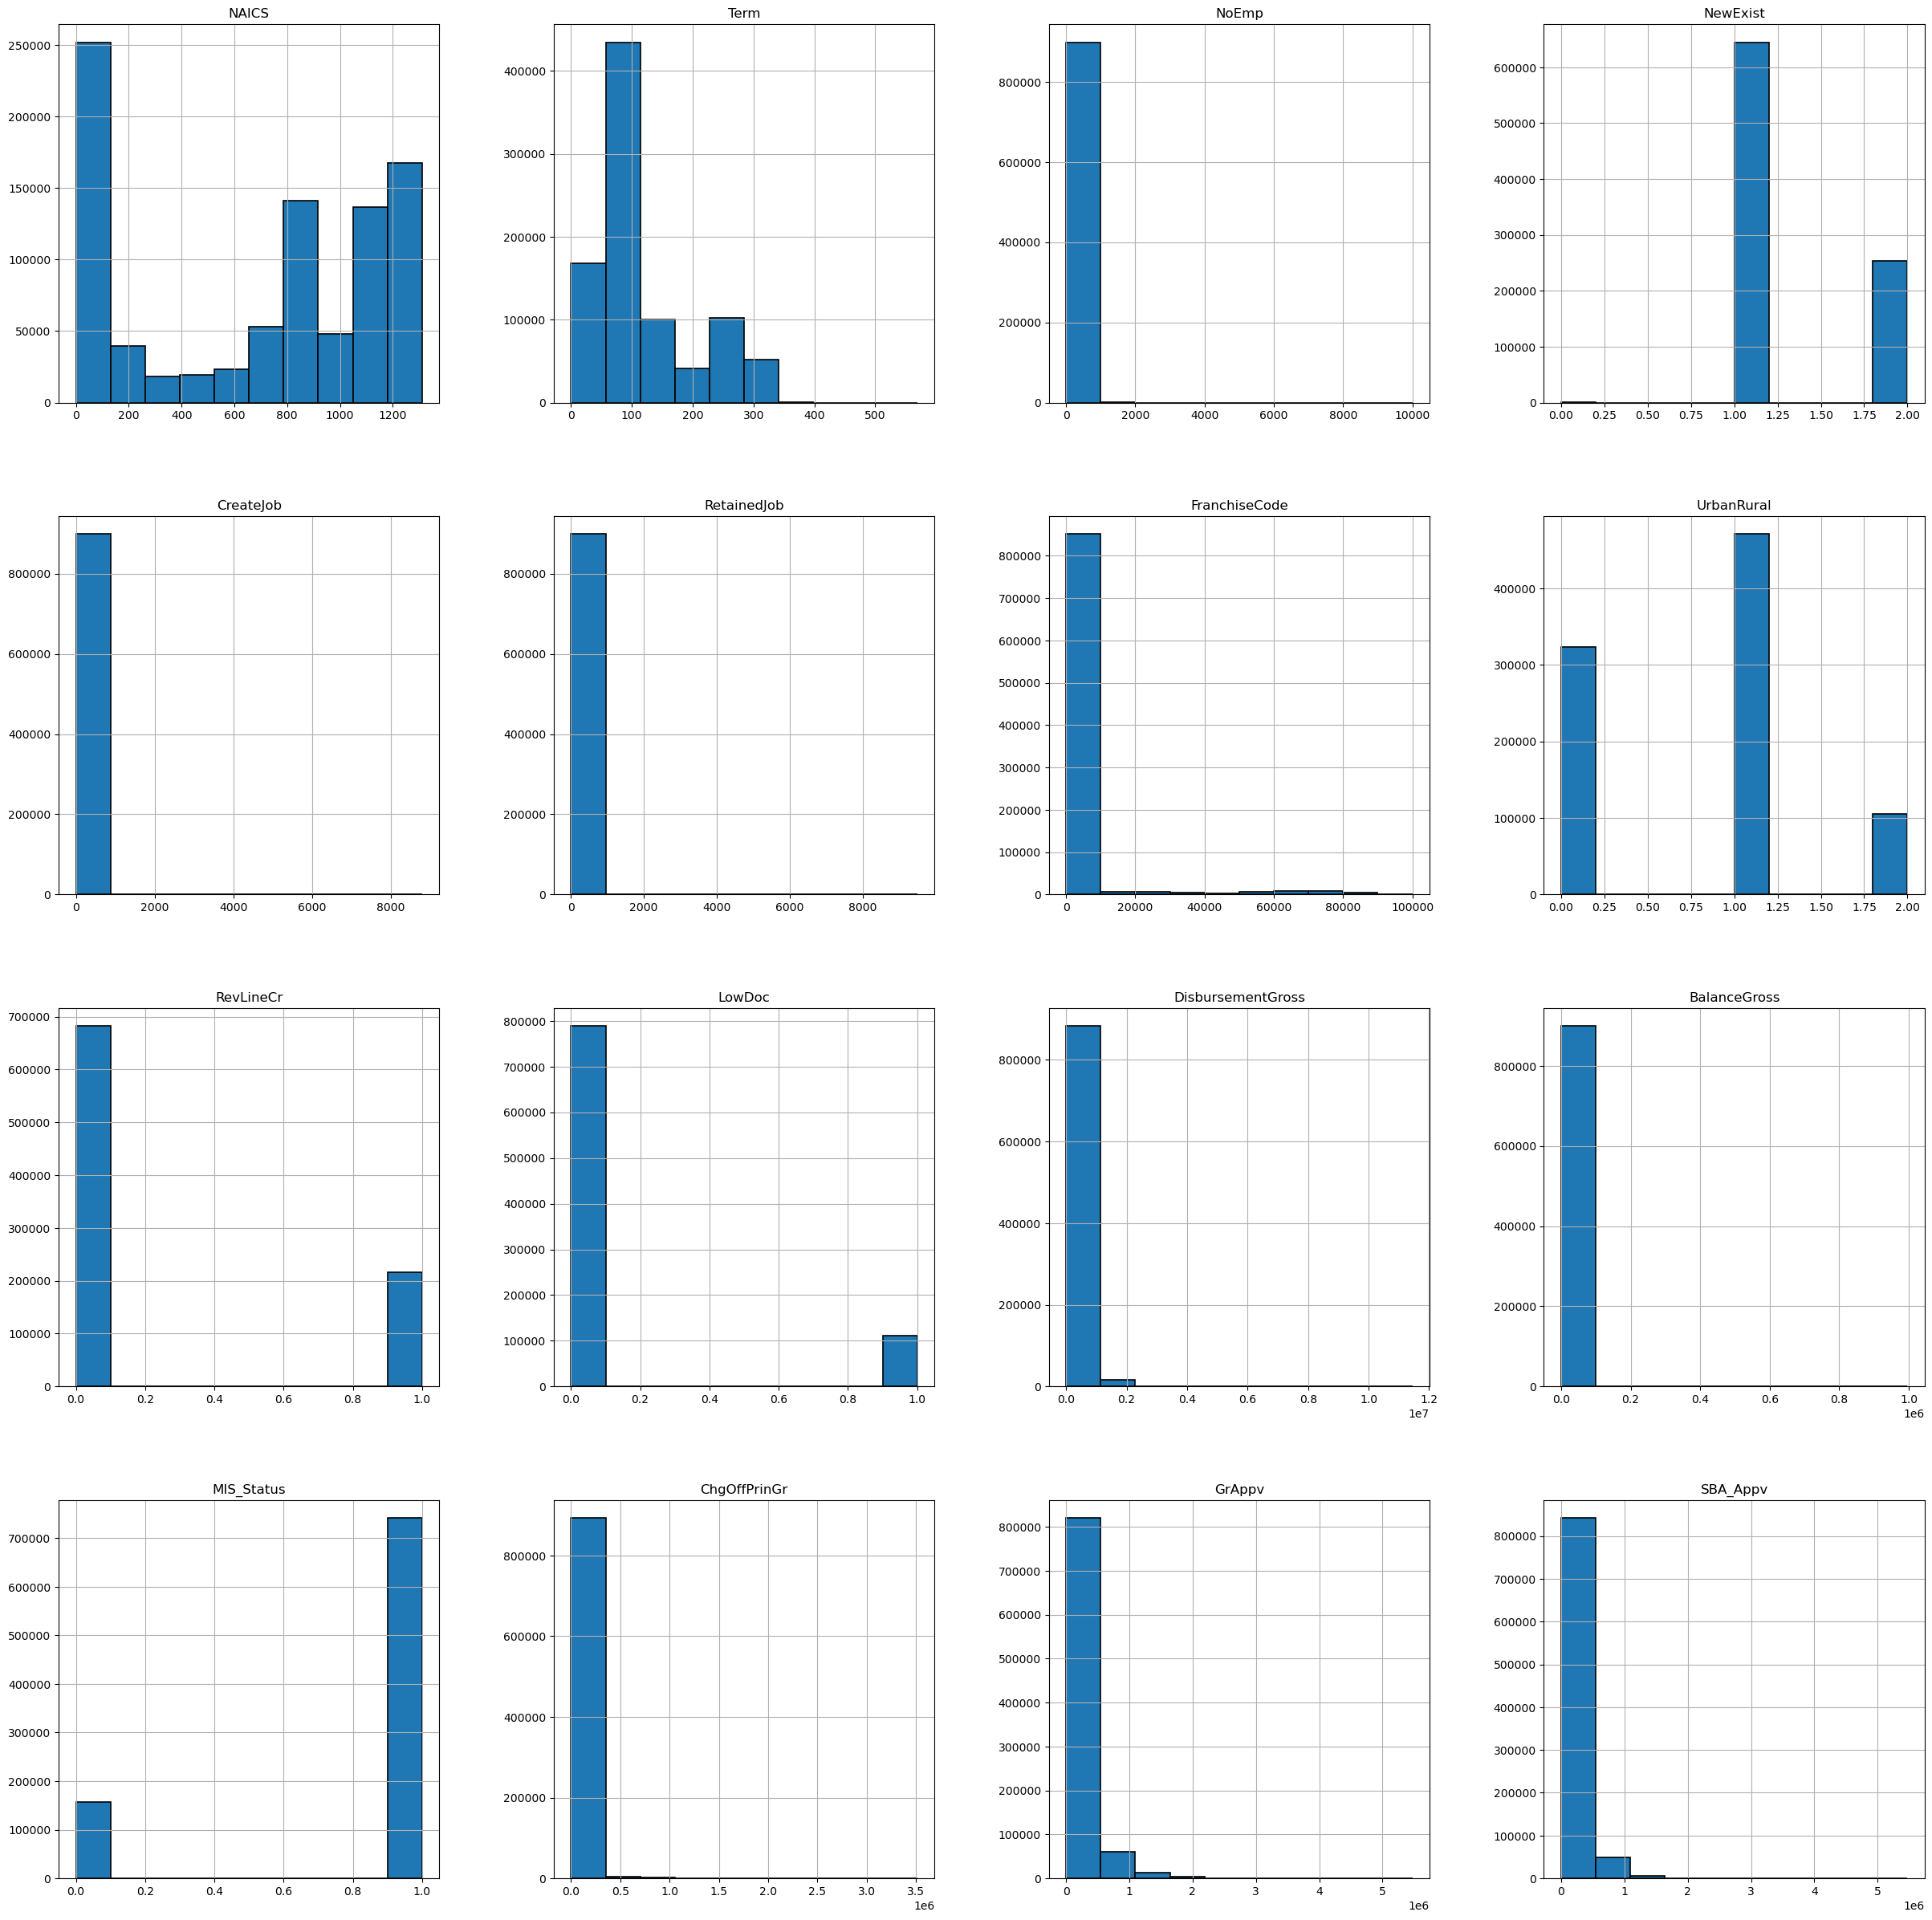

In [57]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(30, 30));

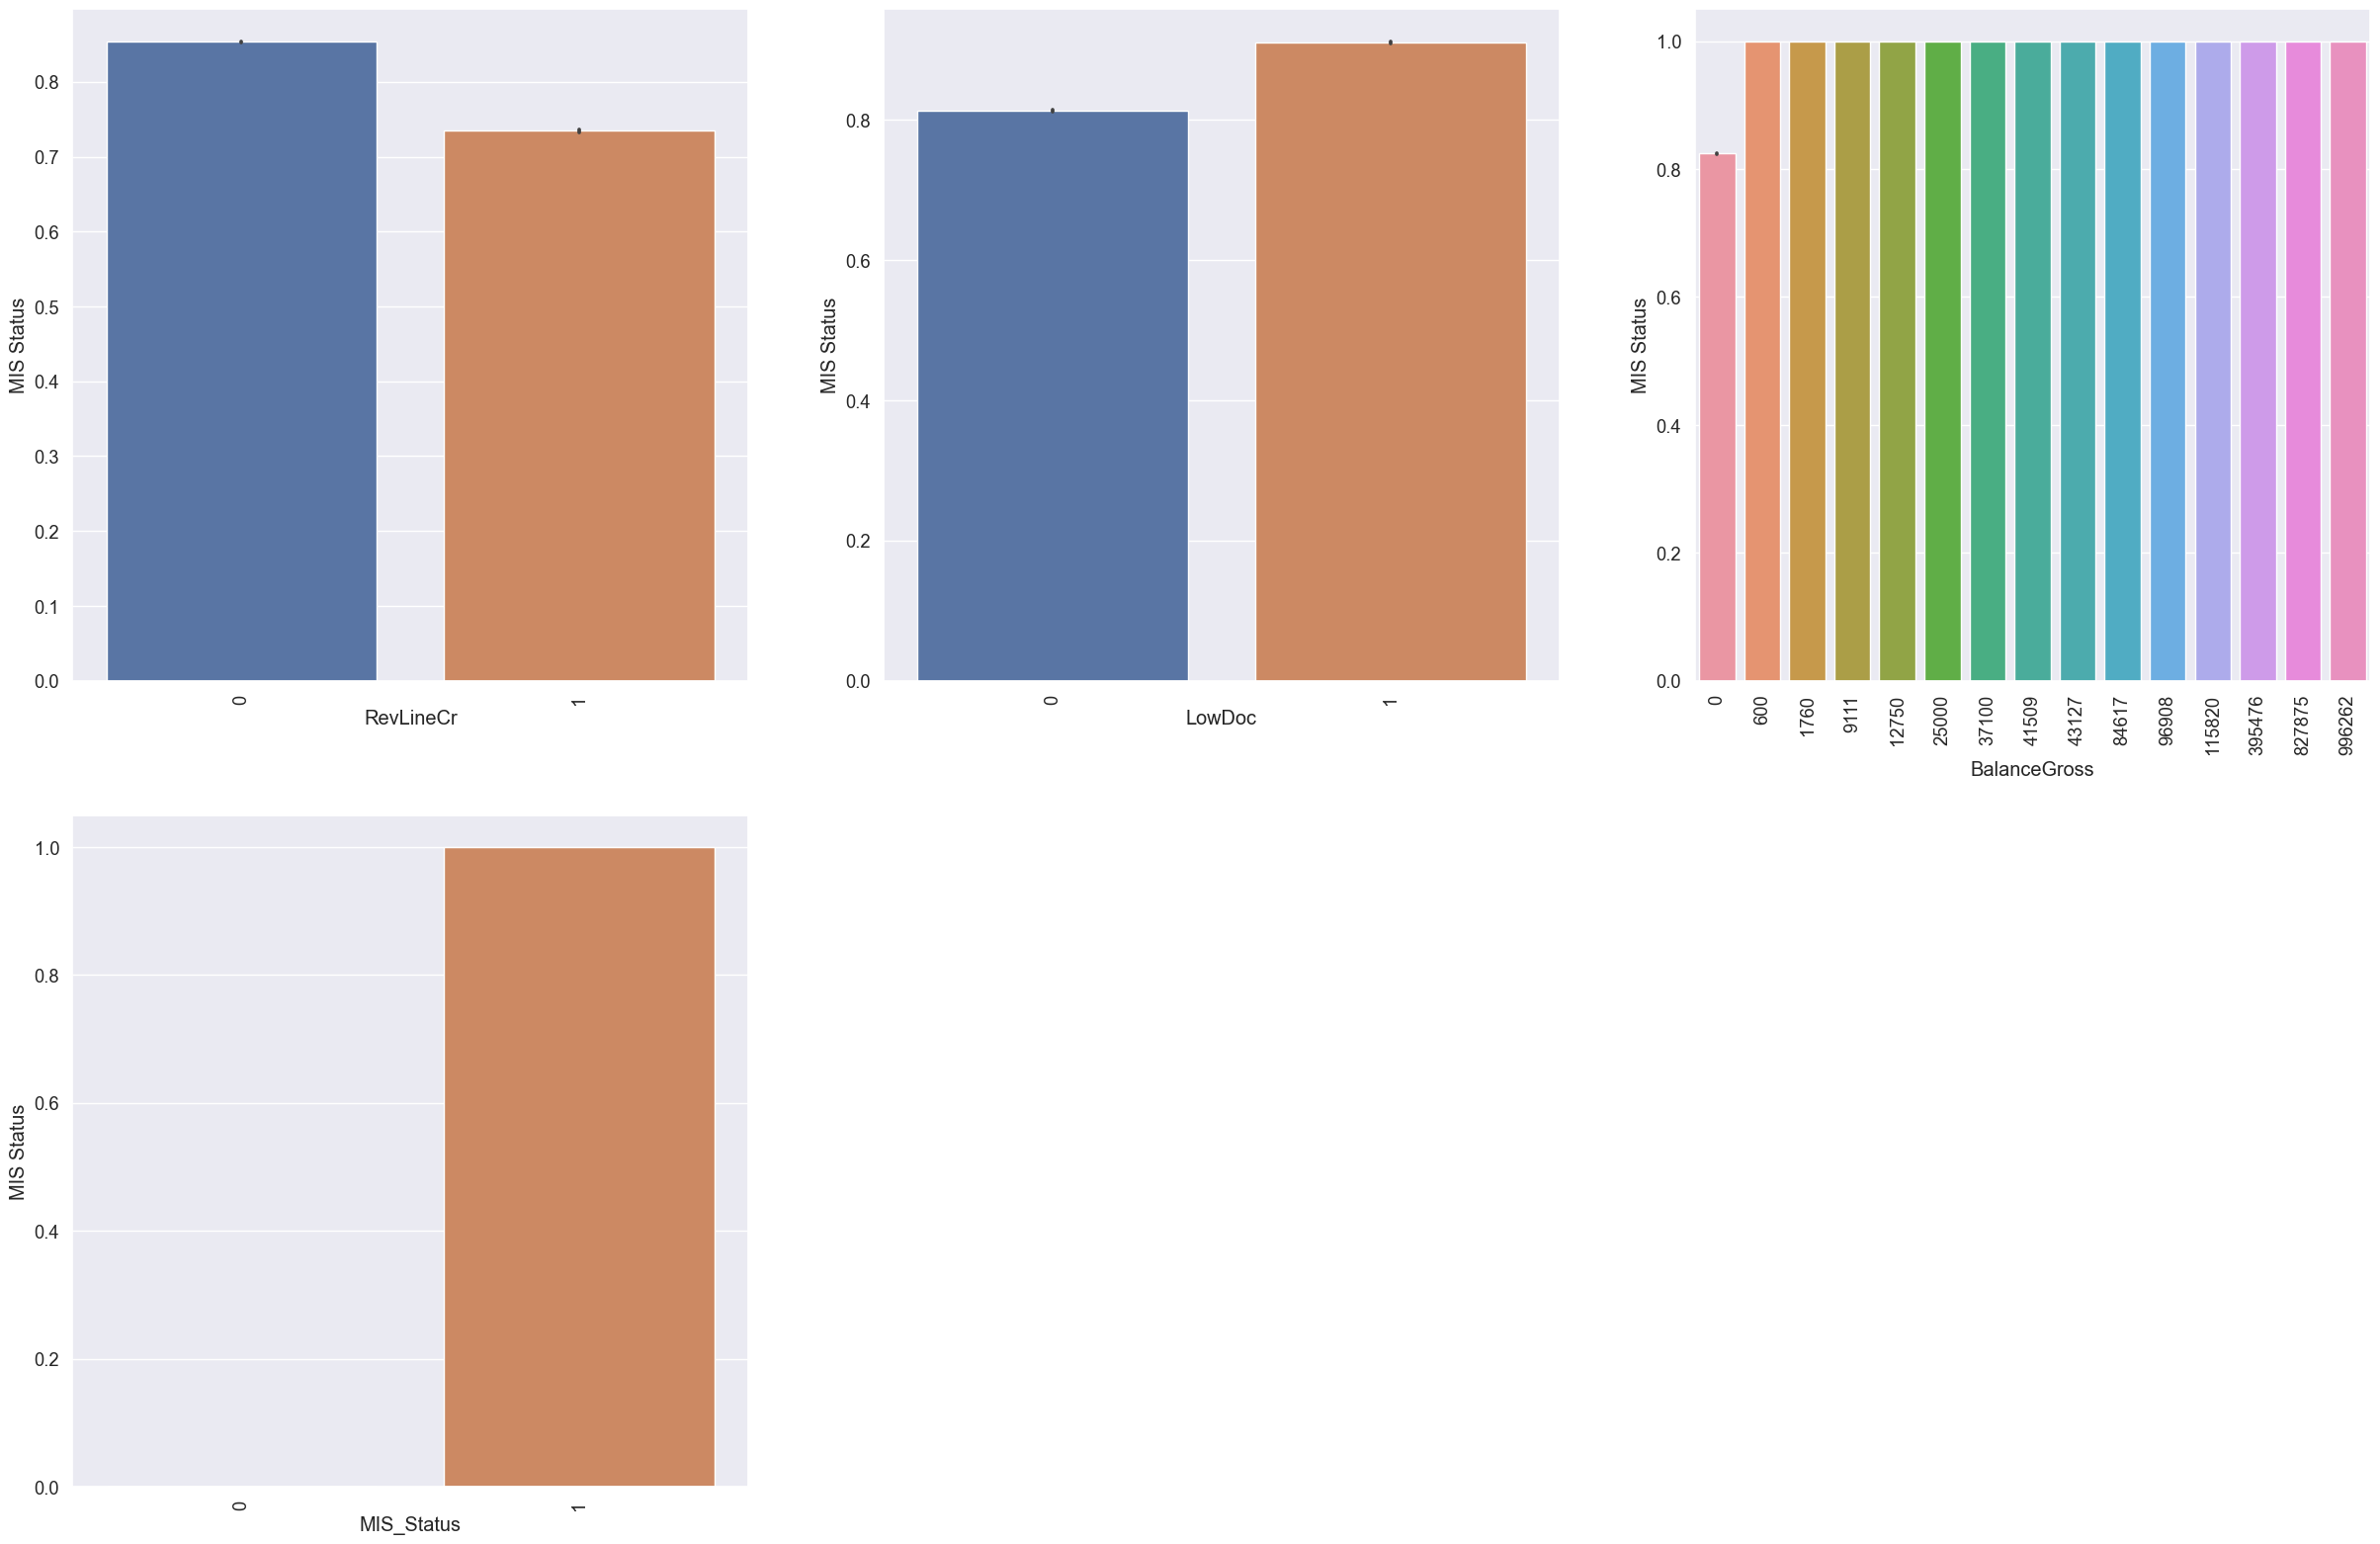

In [58]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='MIS_Status', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('MIS Status')
    plt.xlabel(f'{column}')

<Axes: >

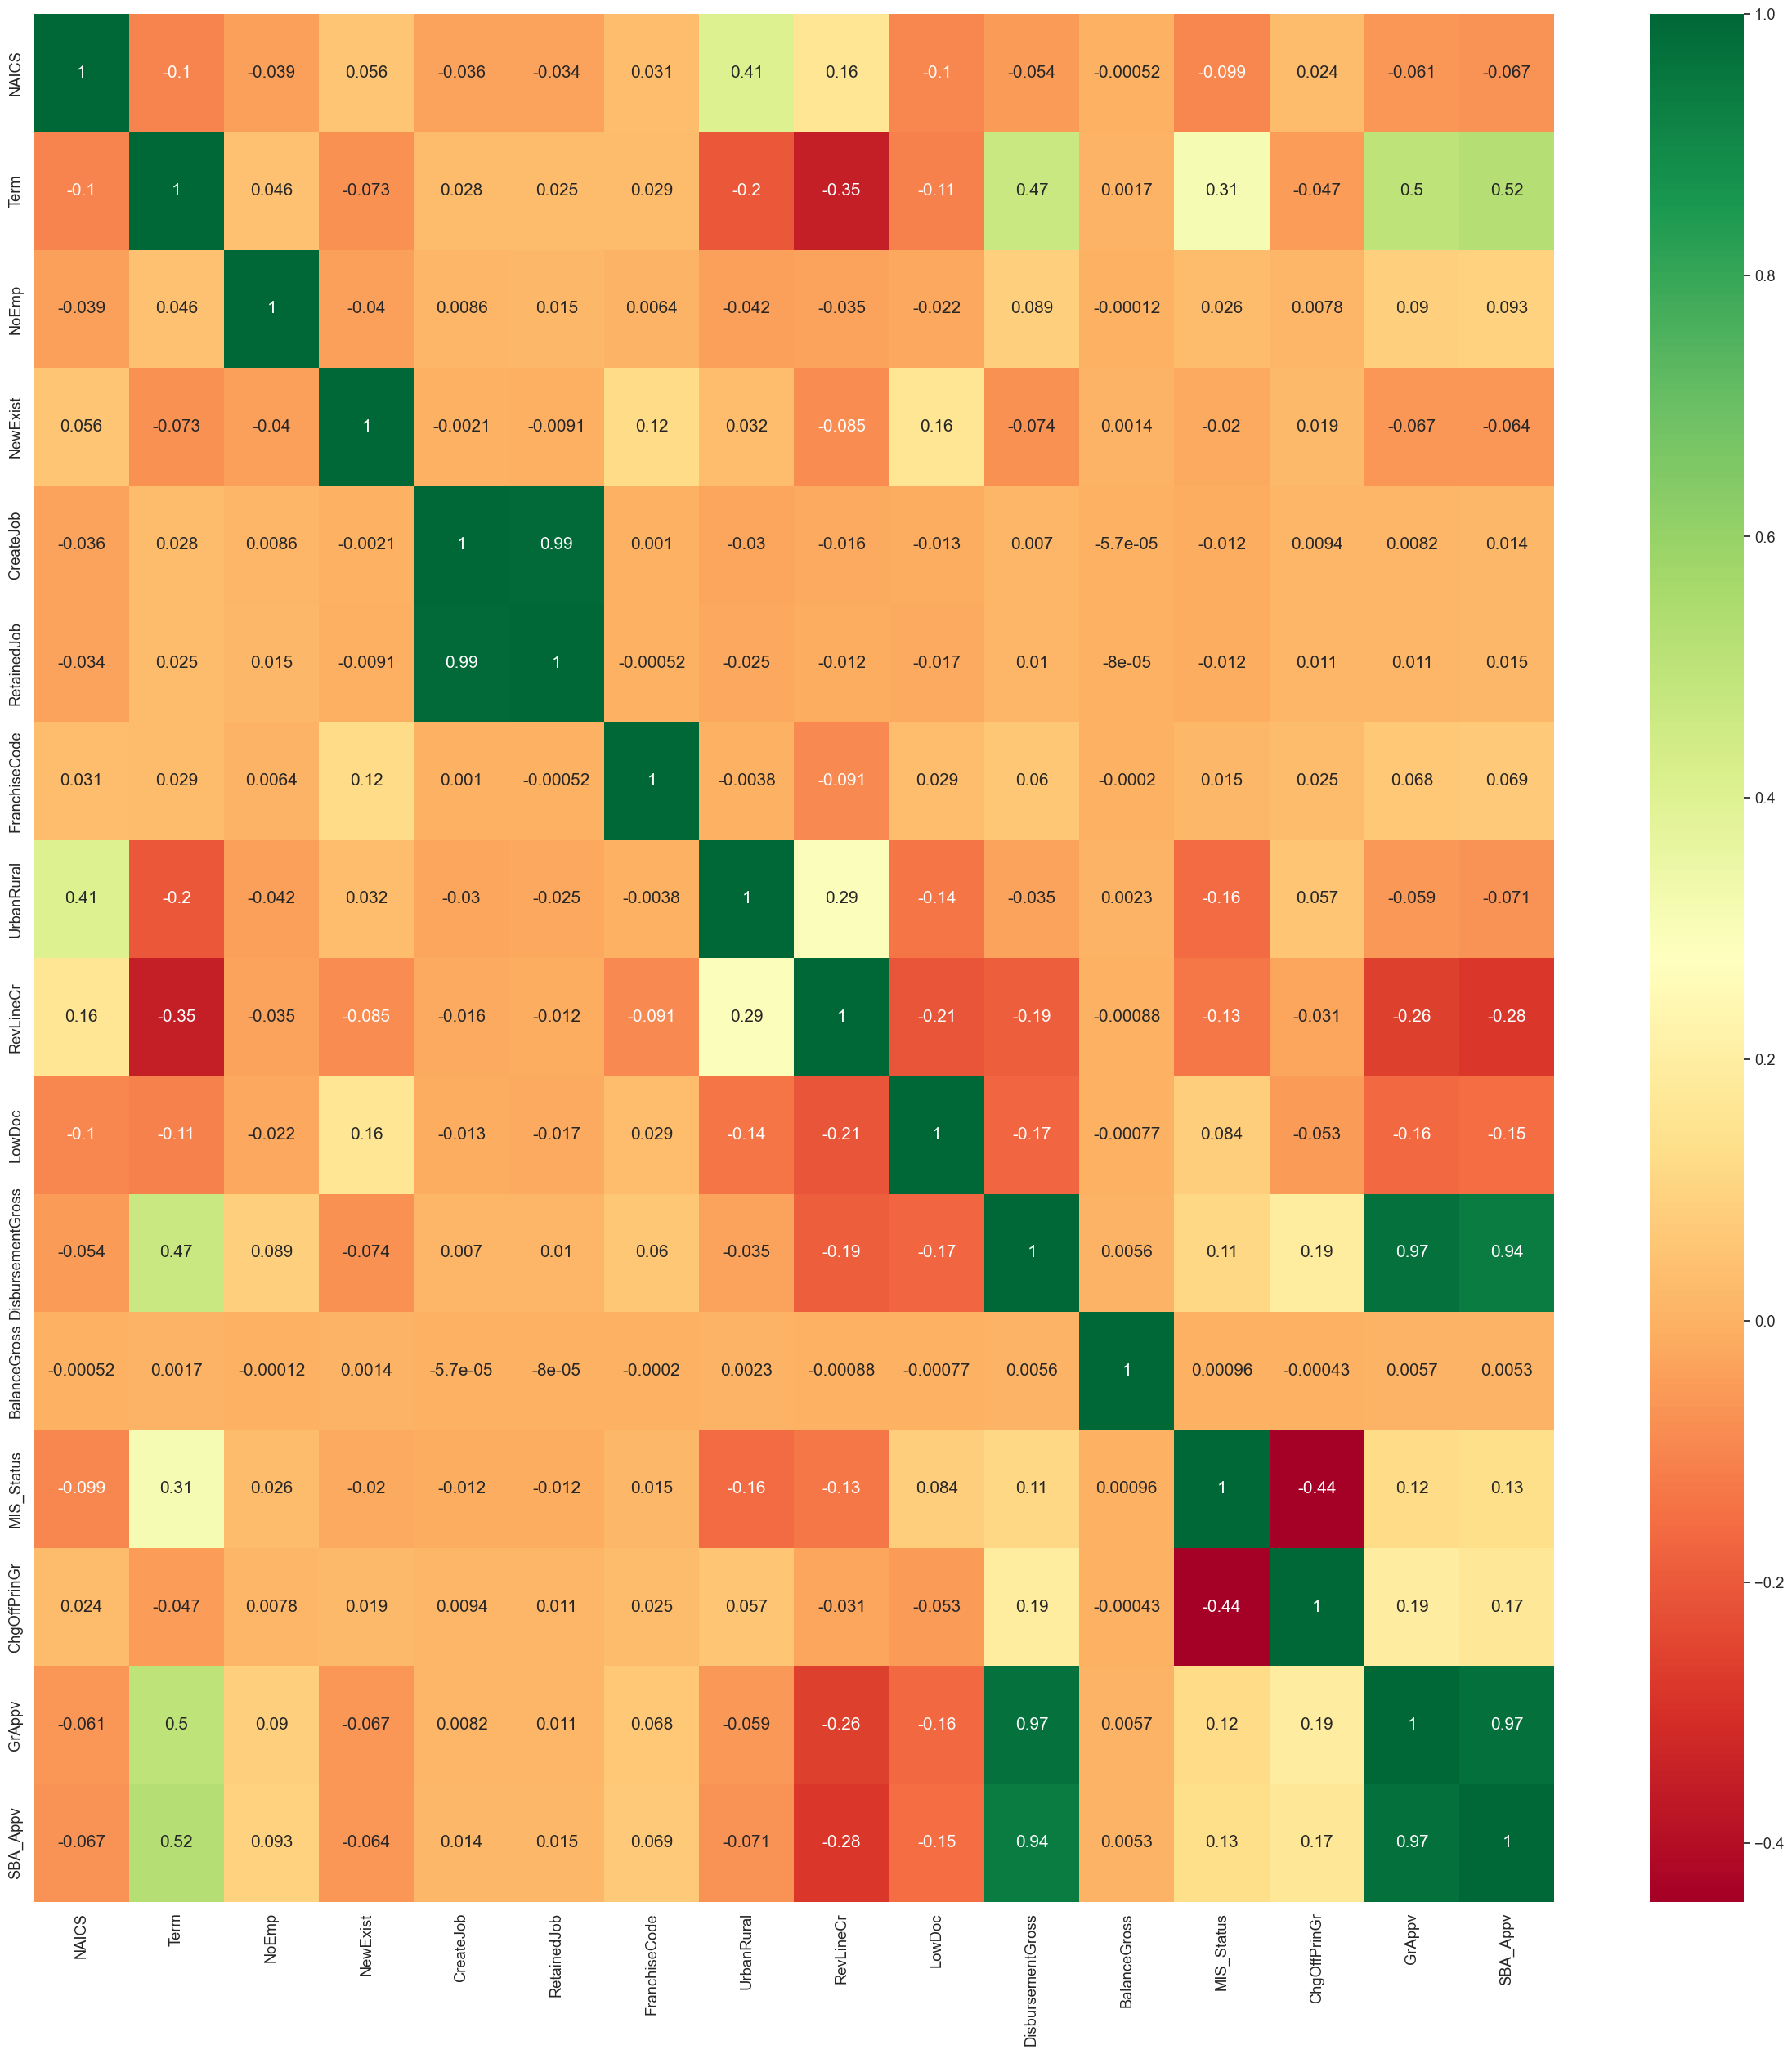

In [59]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Applying Machine Learning Algorithms

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [61]:
X = df.drop('MIS_Status', axis=1)
y = df.MIS_Status

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter Tuning
  ## Random Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [98]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [99]:
[int(x) for x in np.linspace(10, 110, num=11)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [101]:
rf_random.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator'